1. **Imports**:
   - We import necessary libraries and modules:
     - `pandas`: For data manipulation and analysis.
     - `numpy`: For numerical computations.
     - `MinMaxScaler` from `sklearn.preprocessing`: For feature scaling.
     - `train_test_split` from `sklearn.model_selection`: For splitting the dataset into training and testing sets.
     - `tensorflow` and its submodules: For building and training neural networks.
     - `matplotlib.pyplot`: For data visualization.

2. **Load Data**:
   - We load the cleaned dataset from the CSV file using `pd.read_csv()`.

3. **Data Preprocessing**:
   - We scale the input features using `MinMaxScaler` to ensure they are on a similar scale.
   - The dataset is split into training, validation, and test sets using `train_test_split()`.

4. **Model Architecture - DNN**:
   - We define the architecture of the Deep Neural Network (DNN) model using `Sequential()` from TensorFlow.keras.
   - The model consists of multiple dense (fully connected) layers with ReLU activation functions.
   - BatchNormalization layers are added to normalize the activations of the previous layer.
   - Dropout layers are added to mitigate overfitting by randomly dropping a fraction of the connections during training.

5. **Compile the Model**:
   - We compile the model using the Adam optimizer and Mean Squared Error (MSE) loss function.

6. **Callbacks**:
   - EarlyStopping: Monitor the validation loss and stop training if there is no improvement for a certain number of epochs to prevent overfitting.
   - ReduceLROnPlateau: Reduce the learning rate if the validation loss plateaus to help the model converge better.

7. **Model Training**:
   - We train the DNN model using the training data and validate it using the validation data.
   - The model is trained for a maximum of 50 epochs with a batch size of 64 samples.

8. **Evaluation**:
   - We evaluate the trained model's performance on the test set using the test data.
   - The test loss (MSE) is computed and printed to assess the model's generalization performance.

9. **Visualization**:
   - We plot the training and validation loss curves to visualize the training progress and identify potential overfitting.

10. **Prediction**:
    - Finally, we make predictions on the test set using the trained DNN model.

This code implements a Deep Neural Network model for energy consumption prediction in smart home environments, incorporating advanced techniques such as batch normalization, dropout regularization, and early stopping. It aims to achieve accurate and robust predictions while preventing overfitting and ensuring efficient training convergence. Adjustments to hyperparameters and architecture can be made based on experimentation and evaluation results.

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import os

In [7]:
# Load the cleaned data
cleaned_data_file = '../data_cleaning_module/cleaned_data/HomeA-meter4_2016_updated.csv'
df = pd.read_csv(cleaned_data_file)

# Data Preprocessing
scaler = MinMaxScaler()
X = scaler.fit_transform(df.drop(columns=['Date & Time']))
y = df['use [kW]']

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Model Architecture - DNN
model = tf.keras.Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(1)
])

# Compile the model
optimizer = Adam(learning_rate=0.001)  # Update lr to learning_rate
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Define callbacks for early stopping and learning rate reduction
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
]

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_val, y_val), callbacks=callbacks)

# Evaluation
test_loss = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)


Epoch 1/50
6285/6285 [==============================] - 18s 3ms/step - loss: 0.0210 - val_loss: 9.3122e-05 - lr: 0.0010
Epoch 2/50
6285/6285 [==============================] - 17s 3ms/step - loss: 4.4651e-04 - val_loss: 7.6125e-05 - lr: 0.0010
Epoch 3/50
6285/6285 [==============================] - 15s 2ms/step - loss: 2.7445e-04 - val_loss: 4.5368e-05 - lr: 0.0010
Epoch 4/50
6285/6285 [==============================] - 16s 3ms/step - loss: 2.0419e-04 - val_loss: 1.1028e-04 - lr: 0.0010
Epoch 5/50
6285/6285 [==============================] - 16s 2ms/step - loss: 1.6466e-04 - val_loss: 9.0959e-05 - lr: 2.0000e-04
Epoch 6/50
6285/6285 [==============================] - 16s 3ms/step - loss: 1.6178e-04 - val_loss: 1.2301e-04 - lr: 2.0000e-04
Epoch 7/50
6285/6285 [==============================] - 17s 3ms/step - loss: 1.5811e-04 - val_loss: 1.1473e-04 - lr: 2.0000e-04
Epoch 8/50
1572/1572 [==============================] - 2s 1ms/step - loss: 4.0294e-05
Test Loss: 4.0293798519996926e-05


Loss curve saved to: loss_curve.png


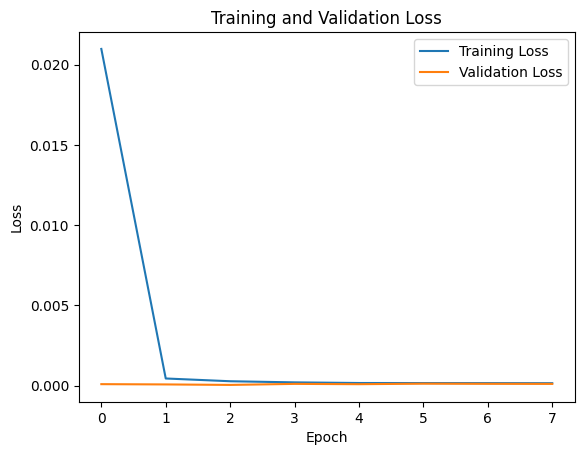

In [8]:
# Plot training and validation loss curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Save the graph to the same folder
graph_file_path = 'loss_curve.png'  # Provide the file name directly
plt.savefig(graph_file_path)

# Display the saved graph file path
print("Loss curve saved to:", graph_file_path)